<a href="https://colab.research.google.com/github/C241-PS517-ISALAT/Isalat-Model/blob/dataset_split/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from PIL import Image
from shutil import copyfile
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = '/content/drive/My Drive/bisindo'

In [4]:
classes = ['A','B','C','D','E','F','H','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [5]:
def check_dataset(PATH, classes):
  '''
  Print number of images per class
  and total of images
  '''
  num_files = 0
  for cls in classes:
    length = len(os.listdir(os.path.join(PATH, cls)))
    print(f"Number of images for {cls}: {length}")
    num_files += length
  print("="*15)
  print("Number of images total:", num_files)

In [6]:
check_dataset(dataset, classes)

Number of images for A: 12
Number of images for B: 12
Number of images for C: 12
Number of images for D: 12
Number of images for E: 12
Number of images for F: 12
Number of images for H: 12
Number of images for G: 12
Number of images for H: 12
Number of images for I: 12
Number of images for J: 12
Number of images for K: 12
Number of images for L: 12
Number of images for M: 12
Number of images for N: 12
Number of images for O: 12
Number of images for P: 12
Number of images for Q: 12
Number of images for R: 12
Number of images for S: 12
Number of images for T: 12
Number of images for U: 12
Number of images for V: 12
Number of images for W: 12
Number of images for X: 12
Number of images for Y: 12
Number of images for Z: 12
Number of images total: 324


In [7]:
def show_images_by_path(PATH, cls):
  '''
  Show 6 images of the given class
  '''
  DIR = os.path.join(PATH, cls)
  image_got = 0
  plt.figure(figsize=(36,6))
  for root, dirs, files in os.walk(DIR):
    for file in files:
      if image_got == 6:
        break
      image_got += 1
      img = mpimg.imread(os.path.join(root, file))
      plt.subplot(1, 6, image_got)
      plt.imshow(img)
  plt.show

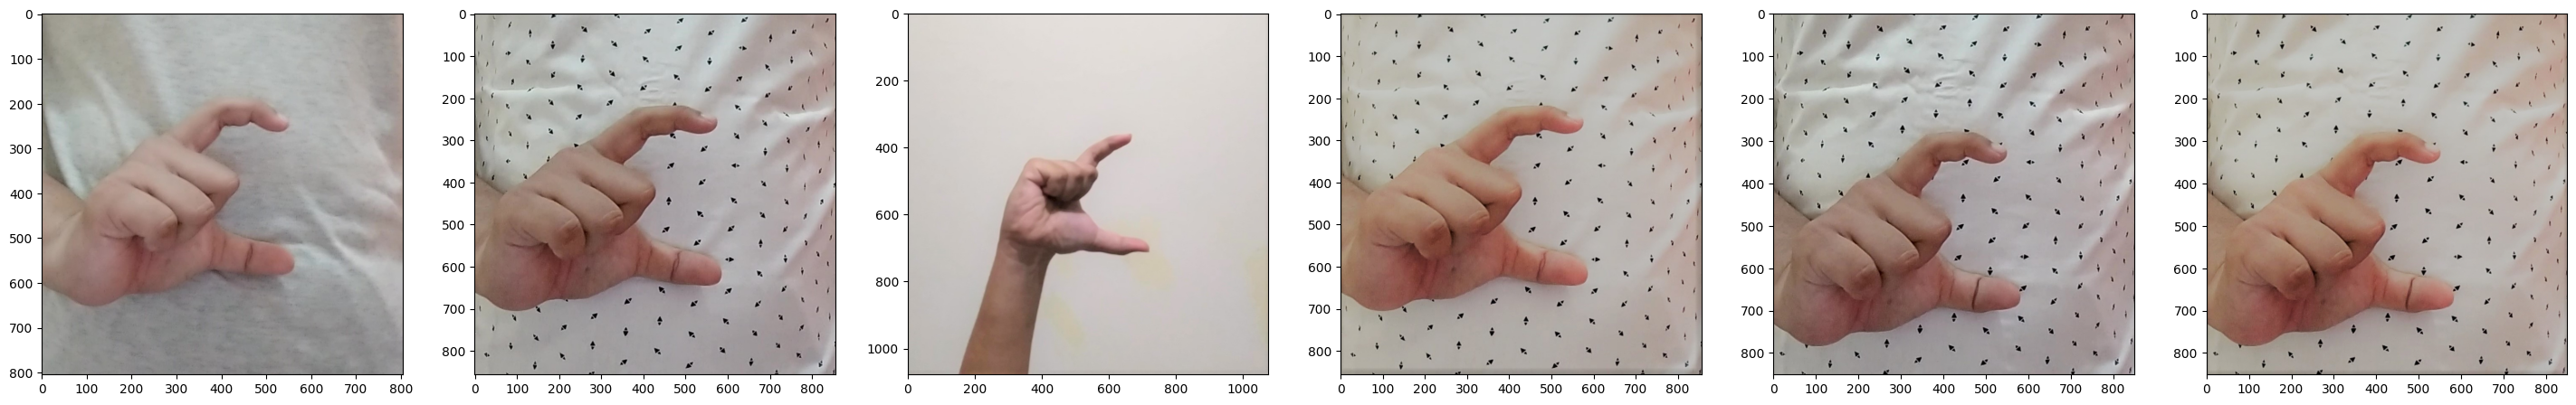

In [8]:
show_images_by_path(dataset, 'C')

In [38]:
target_dir = '/content/drive/My Drive/bisindo/data'

def create_train_val_dirs(root_path, target_dir_exists=True):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  if not target_dir_exists:
    os.makedirs(dataset)
  os.makedirs(os.path.join(root_path, 'train'))
  os.makedirs(os.path.join(root_path, 'test'))

  # Directory with training
  for cls in classes:
    sub_path = "train/" + cls
    os.makedirs(os.path.join(root_path, sub_path))

  # Directory with testing
  for cls in classes:
    sub_path = "test/" + cls
    os.makedirs(os.path.join(root_path, sub_path))

In [39]:
try:
  create_train_val_dirs(root_path=target_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

You should not be seeing this since the upper directory is removed beforehand


In [40]:
for rootdir, dirs, files in os.walk(target_dir + '/train'):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

for rootdir, dirs, files in os.walk(target_dir + '/test'):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

/content/drive/My Drive/bisindo/data/train/A
/content/drive/My Drive/bisindo/data/train/B
/content/drive/My Drive/bisindo/data/train/C
/content/drive/My Drive/bisindo/data/train/D
/content/drive/My Drive/bisindo/data/train/E
/content/drive/My Drive/bisindo/data/train/F
/content/drive/My Drive/bisindo/data/train/H
/content/drive/My Drive/bisindo/data/train/G


In [36]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """

  content = random.sample(os.listdir(SOURCE_DIR), len(os.listdir(SOURCE_DIR)))
  # content = os.listdir(SOURCE_DIR)
  train_size = int(len(content) * SPLIT_SIZE)
  for i, image_name in enumerate(content):
    if os.path.getsize(os.path.join(SOURCE_DIR, image_name)) == 0:
      print(image_name, "is zero length, so ignoring.")
      continue
    if i < train_size:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name), os.path.join(TRAINING_DIR, image_name))
    else:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name), os.path.join(VALIDATION_DIR, image_name))

In [37]:
TRAINING_DIR = os.path.join(target_dir, "train")
VALIDATION_DIR = os.path.join(target_dir, "test")

split_size = .8

for cls in classes:
  train_cls_dir = os.path.join(TRAINING_DIR, cls)
  val_cls_dir = os.path.join(VALIDATION_DIR, cls)
  src_cls_dir = os.path.join(dataset, cls)
  split_data(src_cls_dir, train_cls_dir, val_cls_dir, split_size)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/bisindo/data/test/A/body dot (4).jpg'

In [ ]:
print("Training")
check_dataset(TRAINING_DIR, classes)
print("="*15)
print("Validation")
check_dataset(VALIDATION_DIR, classes)